In [1]:
#3.1
'''
This part is only downloading the data to local
like the hello world example
'''
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#3.2
'''
make plant data to vectorize
Need to make sure this part
'''
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
#3.3
'''
create the model
this model make 3 layers, 16, 16, 1 nodes
the output only yes/no(it is a probability(0~1))
'''
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0211 16:21:10.659689 139987869497152 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0211 16:21:10.678567 139987869497152 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0211 16:21:10.682737 139987869497152 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
#3.4 Original setting
'''
Without any configuration.
Use default rmsprop(optimizer), binary crossentropy(loss function), accuracy(metrics)

all of them are packages so there are no any thing needs to be change
if you want to change something you may consider the following 3.5 and 3.6
'''
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#3.5
'''
This is the example to setting the optimizer
an optimizer is in the back propagation
Momentum, RMSprop(Root Mean Square Prop) and Adam(Adaptive Moment Estimation) are the optimization function
'''
from keras import optimizers
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

#3.6
'''
loss function and metrics
custom losses and metrics
'''
#from keras import losses
#from keras import metrics
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

#3.7
'''
setting validation set
'''
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#3.8
'''
training this model
'''
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

W0211 16:21:34.481784 139987869497152 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0211 16:21:34.502164 139987869497152 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0211 16:21:34.506726 139987869497152 deprecation.py:323] From /usr/lib/python3/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0211 16:21:34.621834 139987869497152 deprecation_wrapper.py:119] From /usr/lib/python3/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_ad

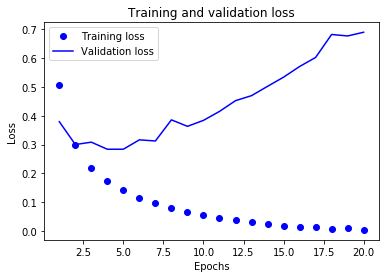

In [6]:
#3.9
'''
polt training and validation loss
'''
import matplotlib.pyplot as plt

acc = history.history['acc']#textbook lost this line
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

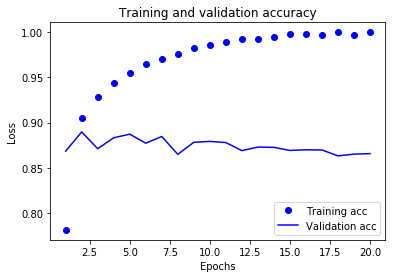

In [10]:
#3.10
'''
Plotting the training and validation accuracy
'''
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()